### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 8
### Due: Saturday, Apr 6th at 11.59pm CT
---

## Only one problem this week

1. Use the following code snippet to read in SDSS galaxy color data.
<!--```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```-->

`data = np.load('../hw_data/hw8_data_1.npy')`

This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.


4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*


5. Repeat (4) for Quadratic Discriminant Analysis. 


6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.


7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 


8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 


9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 


10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

In [302]:
#loading data
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
os.chdir('/home/hoelsczj/repos/astr_8070_S24/coursework/homeworks/hw_data/')
data=np.load('hw8_data_1.npy')
print(data.dtype.names) #column titles 
print(data) #the data values 

#Doing this with a loop instead of vectorizing it because the data is an array of tuples rather than 2d array.
#Had trouble converting it to a 2d array.
u=[]
g=[]
r=[]
i=[] #initializing empty lists 
z=[]
specClass=[]
redshift=[]
redshift_err=[]
for element in data:
    u.append(element[0])
    g.append(element[1]) #appending relevant elements to each list 
    r.append(element[2])
    i.append(element[3])
    z.append(element[4])
    specClass.append(element[5])
    redshift.append(element[6])
    redshift_err.append(element[7])
u=np.array(u) #converting lists to arrays 
g=np.array(g)
r=np.array(r)
i=np.array(i)
z=np.array(z)
redshift=np.array(redshift)
specClass=np.array(specClass)
u_minus_g=u-g
g_minus_r=g-r
r_minus_i=r-i
i_minus_z=i-z

types, counts = np.unique(specClass, return_counts=True) #finding number of elements of each unique type 
number_galaxies=counts[0] #two unique types, one is galaxies, one is quasars 
number_quasars=counts[1]

print("Number Galaxies: ")
print(number_galaxies) #printing number of quasars and number of galaxies 
print("Number Quasars: ")
print(number_quasars)


('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
[(19.46392, 18.89363, 18.85225, 18.8241 , 18.53599, 'QSO', 2.312959  , 1.925222e-04)
 (18.33262, 16.29118, 15.3018 , 14.81997, 14.45467, 'GALAXY', 0.05187586, 1.396275e-05)
 (18.85941, 17.01412, 15.97252, 15.51533, 15.11948, 'GALAXY', 0.09769295, 1.805014e-05)
 ...
 (18.76492, 18.12947, 18.04838, 17.94089, 17.677  , 'QSO', 2.267401  , 1.777254e-04)
 (19.36827, 19.06754, 18.9035 , 18.84508, 18.82694, 'QSO', 1.407278  , 8.702147e-04)
 (19.37275, 18.82985, 18.69858, 18.53639, 18.43456, 'QSO', 0.6865192 , 1.417279e-04)]
Number Galaxies: 
42808
Number Quasars: 
7192


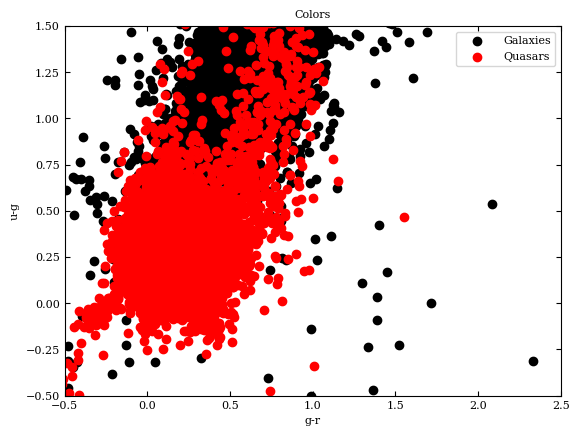

In [304]:
Galaxies_Indicies=np.where(specClass=="GALAXY") #find all indicies where it is a normal galaxy 
Quasars_Indicies=np.where(specClass=="QSO") #find all indicies where it is a quasar 
u_minus_g_galaxies=u_minus_g[Galaxies_Indicies]
u_minus_g_quasars=u_minus_g[Quasars_Indicies] #pull out all elements that are galaxies or quasars to separate them 
g_minus_r_galaxies=g_minus_r[Galaxies_Indicies]
g_minus_r_quasars=g_minus_r[Quasars_Indicies]

plt.scatter(g_minus_r_galaxies, u_minus_g_galaxies, label="Galaxies", color='k') #scatter plot, color coded with legend 
plt.scatter(g_minus_r_quasars, u_minus_g_quasars, label="Quasars", color='r')
plt.xlabel('g-r')
plt.ylabel('u-g')
plt.title('Colors')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.5)
plt.legend()
plt.show()

These two groups have a lot of overlap. Problem?

In [310]:
X=np.transpose(np.vstack((u_minus_g, g_minus_r, r_minus_i, i_minus_z, redshift))) #colors and redshift in columns 
Target=np.zeros(len(specClass)) #default all elements to zero 
Target[Quasars_Indicies]=1 #change elements for quasar to 1 
print(Target)

[1. 0. 0. ... 1. 1. 1.]


In [311]:
import sklearn.model_selection
X_train, X_test = sklearn.model_selection.train_test_split(X, test_size=0.2) #train test split, 20 percent set aside for testing 
y_train, y_test = sklearn.model_selection.train_test_split(Target, test_size=0.2) #train test split, 20 percent set aside for testing 
print(len(X_train))
print(len(X_test))

40000
10000


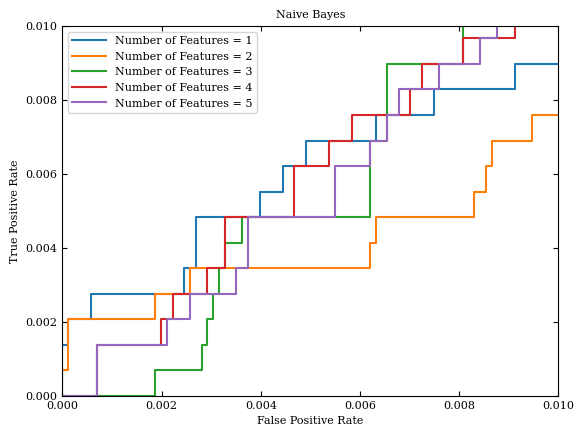

In [319]:
from sklearn.naive_bayes import GaussianNB
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve

# carry out Naive Bayes
Nfeatures = np.arange(1,6) #make list of number of features to use 

#I'm not sure how compact you want this. If you mean a one line list comprehension, I'm not sure how to do that for this and keep something that is easily readable. 
#I could do something like this, though it would be less readable:

clf = GaussianNB()
for n in Nfeatures:
    clf.fit(X_train[:, :n], y_train) #do the fit 
    plt.plot(roc_curve(y_test, clf.predict_proba(X_test[:, :n])[:,1])[0], roc_curve(y_test, clf.predict_proba(X_test[:, :n])[:,1])[1], label='Number of Features = '+str(n)) #add a line to the plot 
#Original:
"""
for n in Nfeatures:
    clf = GaussianNB()
    clf.fit(X_train[:, :n], y_train) #do the fit 
    y_prob = clf.predict_proba(X_test[:, :n])[:,1] #the 1 is so we are looking at quasars 
    fpr, tpr, thresholds = roc_curve(y_test, y_prob) #find false postive rate and true positive rate 
    plt.plot(fpr, tpr, label='Number of Features = '+str(n)) #add a line to the plot 
"""
plt.legend()
plt.title("Naive Bayes")
plt.xlim(0,0.01)
plt.ylim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

This plot doesn't look good. The paths are all somewhat close to the straight line from the lower left corner to upper right corner. Suggests that it is struggling to classify things better than randomly classifying them. Not sure what is wrong here. No curve jumps out as being the best, though that is likely because something is very wrong. 

I would expect redshift to be the feature that really helps separate galaxies and quasars. 

If I have to pick one as being the best, I'll take one feature, as this has the highest true positive rate here. Still looks bad. 

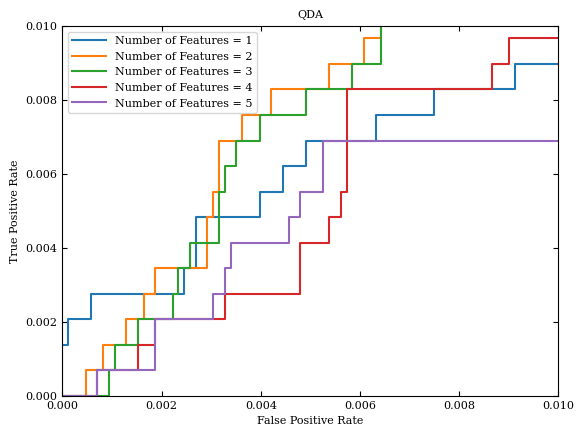

In [320]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# QDA 
Nfeatures = np.arange(1,6)

for n in Nfeatures:
    qda = QDA()
    qda.fit(X_train[:, :n], y_train) #do the fit 
    y_prob = qda.predict_proba(X_test[:, :n])[:,1] #the 1 is because we want quasars 
    fpr, tpr, thresholds = roc_curve(y_test, y_prob) #find false positive rate and true positive rate 
    plt.plot(fpr, tpr, label='Number of Features = '+str(n)) #plot a line for each case 
plt.legend()
plt.title("QDA")
plt.xlim(0,0.01) #axis limits 
plt.ylim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


This also looks very wrong. Not sure what the issue is. Maybe has something to do with there being a lot of overlap between quasars and galaxies on the scatter plot, so the classifiers cannot tell them apart easily?

I would expect redshift to be the feature that really helps separate galaxies and quasars. I'll take two features as the best, though none stand out much. 

/home/hoelsczj/miniconda3/envs/SNR/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/hoelsczj/miniconda3/envs/SNR/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/hoelsczj/miniconda3/envs/SNR/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


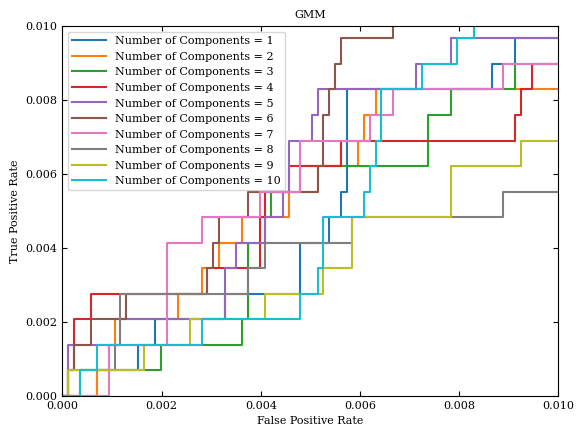

In [322]:
from astroML.classification import GMMBayes

for n_components in range(1,11): #1 to 10 components 
    gmm = GMMBayes(n_components, tol=1E-5, covariance_type='full')
    gmm.fit(X_train[:,:4], y_train) #using all 4 colors, but no redshift 
    y_pred = gmm.predict(X_test[:,:4])
    y_prob = gmm.predict_proba(X_test[:,:4])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label='Number of Components = '+str(n_components))
plt.legend()
plt.title("GMM")
plt.xlim(0,0.01)
plt.ylim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


These also look bad. If I have to pick one as being the best, I'll take 6 components. (Fairly high true positive rate compared to some other lines here.) 

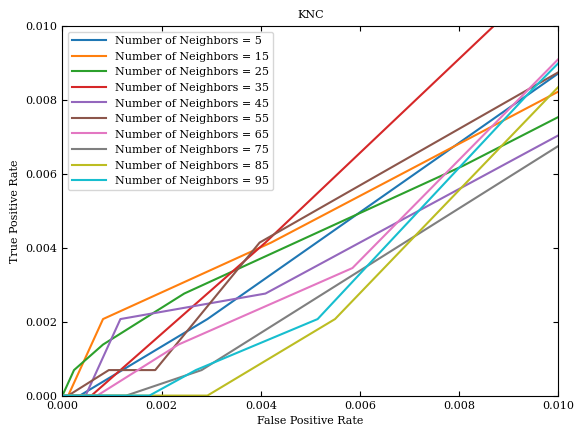

In [323]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

n_neighbors=5 #start with 5 neighbors 
scores=[] #initialize empty lists
number_neighbors_list=[]
while n_neighbors<100: #keep looping up to 100 neighbors 
    number_neighbors_list.append(n_neighbors)
    knc = KNeighborsClassifier(n_neighbors)
    knc.fit(X_train[:,:4], y_train) #using all 4 colors, but no redshift 
    y_pred = knc.predict(X_test[:,:4])
    y_prob = knc.predict_proba(X_test[:,:4])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label='Number of Neighbors = '+str(n_neighbors))
    CVpredk = cross_val_predict(knc, X_test, y_test) #for making a different plot 
    scores.append(accuracy_score(y_test, CVpredk)) 
    n_neighbors=n_neighbors+10 #steps of 10 
plt.legend()
plt.title("KNC")
plt.xlim(0,0.01)
plt.ylim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

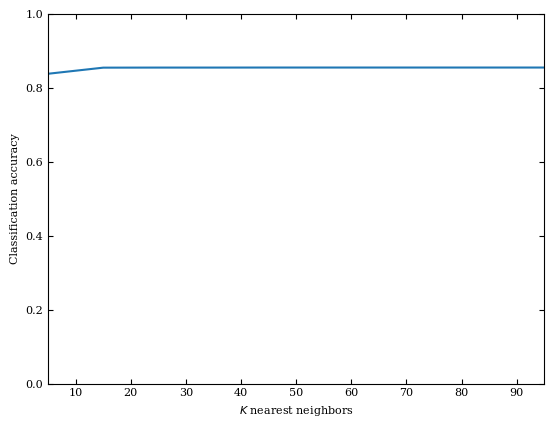

In [324]:
plt.plot(number_neighbors_list,scores)
plt.xlabel('$K$ nearest neighbors')
plt.ylabel('Classification accuracy')
plt.ylim(0,1)
plt.show()

I'll pick 35 neighbors as being the best, though none look good in the ROC plot. In the classification accuracy plot, it seems we get no real benefit above 15 or 20 neighbors.  

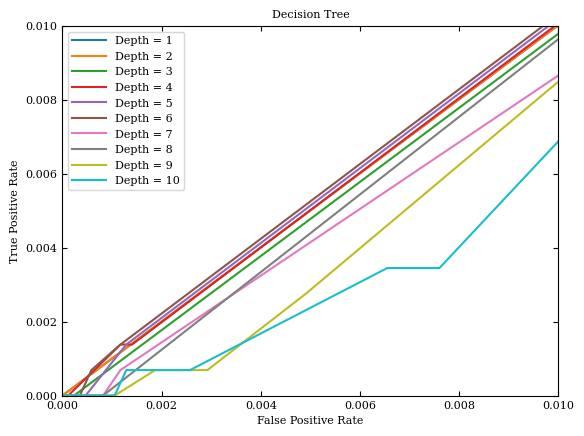

In [325]:
from sklearn.tree import DecisionTreeClassifier
for n in range(1,11): #1 to 10  
    tree = DecisionTreeClassifier(random_state=0, max_depth=n,criterion='entropy')
    tree.fit(X_train[:,:4], y_train) #using all 4 colors, but no redshift 
    y_pred = tree.predict(X_test[:,:4])
    y_prob = tree.predict_proba(X_test[:,:4])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label='Depth = '+str(n))
plt.legend()
plt.title("Decision Tree")
plt.xlim(0,0.01)
plt.ylim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

I'll pick depth of 6 as the best, as it has the highest true positive rate, though none look great.

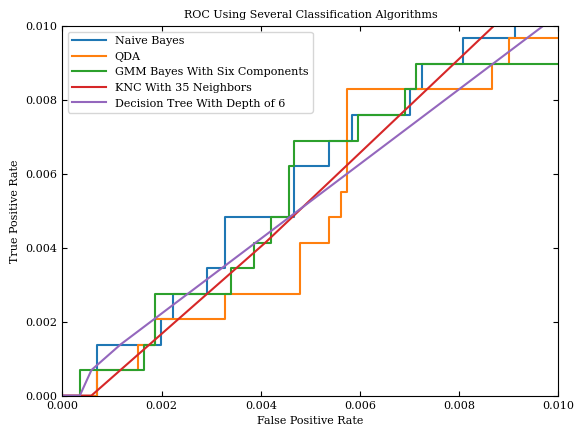

In [327]:
gnb = GaussianNB()
gnb.fit(X_train[:, :4], y_train)
y_prob = gnb.predict_proba(X_test[:, :4])[:,1] #the 1 is so we are looking at quasars 
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes')
plt.legend()

qda = QDA()
qda.fit(X_train[:, :4], y_train)
y_prob = qda.predict_proba(X_test[:, :4])[:,1]
fpr_qda, tpr_qda, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr_qda, tpr_qda, label='QDA') 
plt.legend()

n_components=6
gmm = GMMBayes(n_components, tol=1E-5, covariance_type='full')
gmm.fit(X_train[:,:4], y_train) #using all 4 colors, but no redshift 
y_pred = gmm.predict(X_test[:,:4])
y_prob = gmm.predict_proba(X_test[:,:4])[:,1]
fpr_gmm, tpr_gmm, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr_gmm, tpr_gmm, label='GMM Bayes With Six Components')
plt.legend()

n_neighbors=35
knc = KNeighborsClassifier(n_neighbors)
knc.fit(X_train[:,:4], y_train) #using all 4 colors, but no redshift 
y_pred = knc.predict(X_test[:,:4])
y_prob = knc.predict_proba(X_test[:,:4])[:,1]
fpr_knc, tpr_knc, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr_knc, tpr_knc, label='KNC With 35 Neighbors')
plt.legend()

n=6
tree = DecisionTreeClassifier(random_state=0, max_depth=n,criterion='entropy')
tree.fit(X_train[:,:4], y_train) #using all 4 colors, but no redshift 
y_pred = tree.predict(X_test[:,:4])
y_prob = tree.predict_proba(X_test[:,:4])[:,1]
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree With Depth of 6')
plt.legend()
plt.title("Decision Tree")
plt.xlim(0,0.01)
plt.ylim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Using Several Classification Algorithms')
plt.show()



None of these performed well, though if I had to pick one as the best, I'd go with the GMM Bayes, as it has a slightly higher true positive rate, and deviation from the straight line path.  

<Figure size 640x480 with 0 Axes>

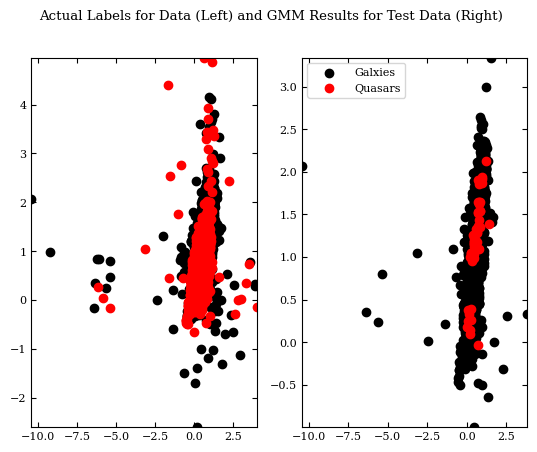

In [339]:
plt.clf()
y_pred = gmm.predict(X_test[:,:4]) #predicted values from gmm Bayes, testing data 

Galaxies_Indicies_GMM=np.where(y_pred==0) #find all indicies where it is a normal galaxy 
Quasars_Indicies_GMM=np.where(y_pred==1) #find all indicies where it is a quasar 

u_minus_g_galaxies_GMM=u_minus_g[Galaxies_Indicies_GMM]
u_minus_g_quasars_GMM=u_minus_g[Quasars_Indicies_GMM] #pull out all elements that are galaxies or quasars to separate them 
g_minus_r_galaxies_GMM=g_minus_r[Galaxies_Indicies_GMM]
g_minus_r_quasars_GMM=g_minus_r[Quasars_Indicies_GMM]

figure, (ax1, ax2) = plt.subplots(1, 2) #setting up two side by side plots 
figure.suptitle('Actual Labels for Data (Left) and GMM Results for Test Data (Right)')

ax1.scatter(g_minus_r_galaxies, u_minus_g_galaxies, label="Galxies", color='k') #scatter plot, color coded with legend 
ax1.scatter(g_minus_r_quasars, u_minus_g_quasars, label="Quasars", color='r')

ax2.scatter(g_minus_r_galaxies_GMM, u_minus_g_galaxies_GMM, label="Galxies", color='k') #scatter plot, color coded with legend 
ax2.scatter(g_minus_r_quasars_GMM, u_minus_g_quasars_GMM, label="Quasars", color='r')
plt.legend()
plt.show()


This has clearly not worked well at classifying the objects. This has mislabeled many quasars as regular galaxies. 